In [1]:
%matplotlib inline

import pandas as pd
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

from sky_spot.utils import ClusterType

plt.rc('font', size=16)

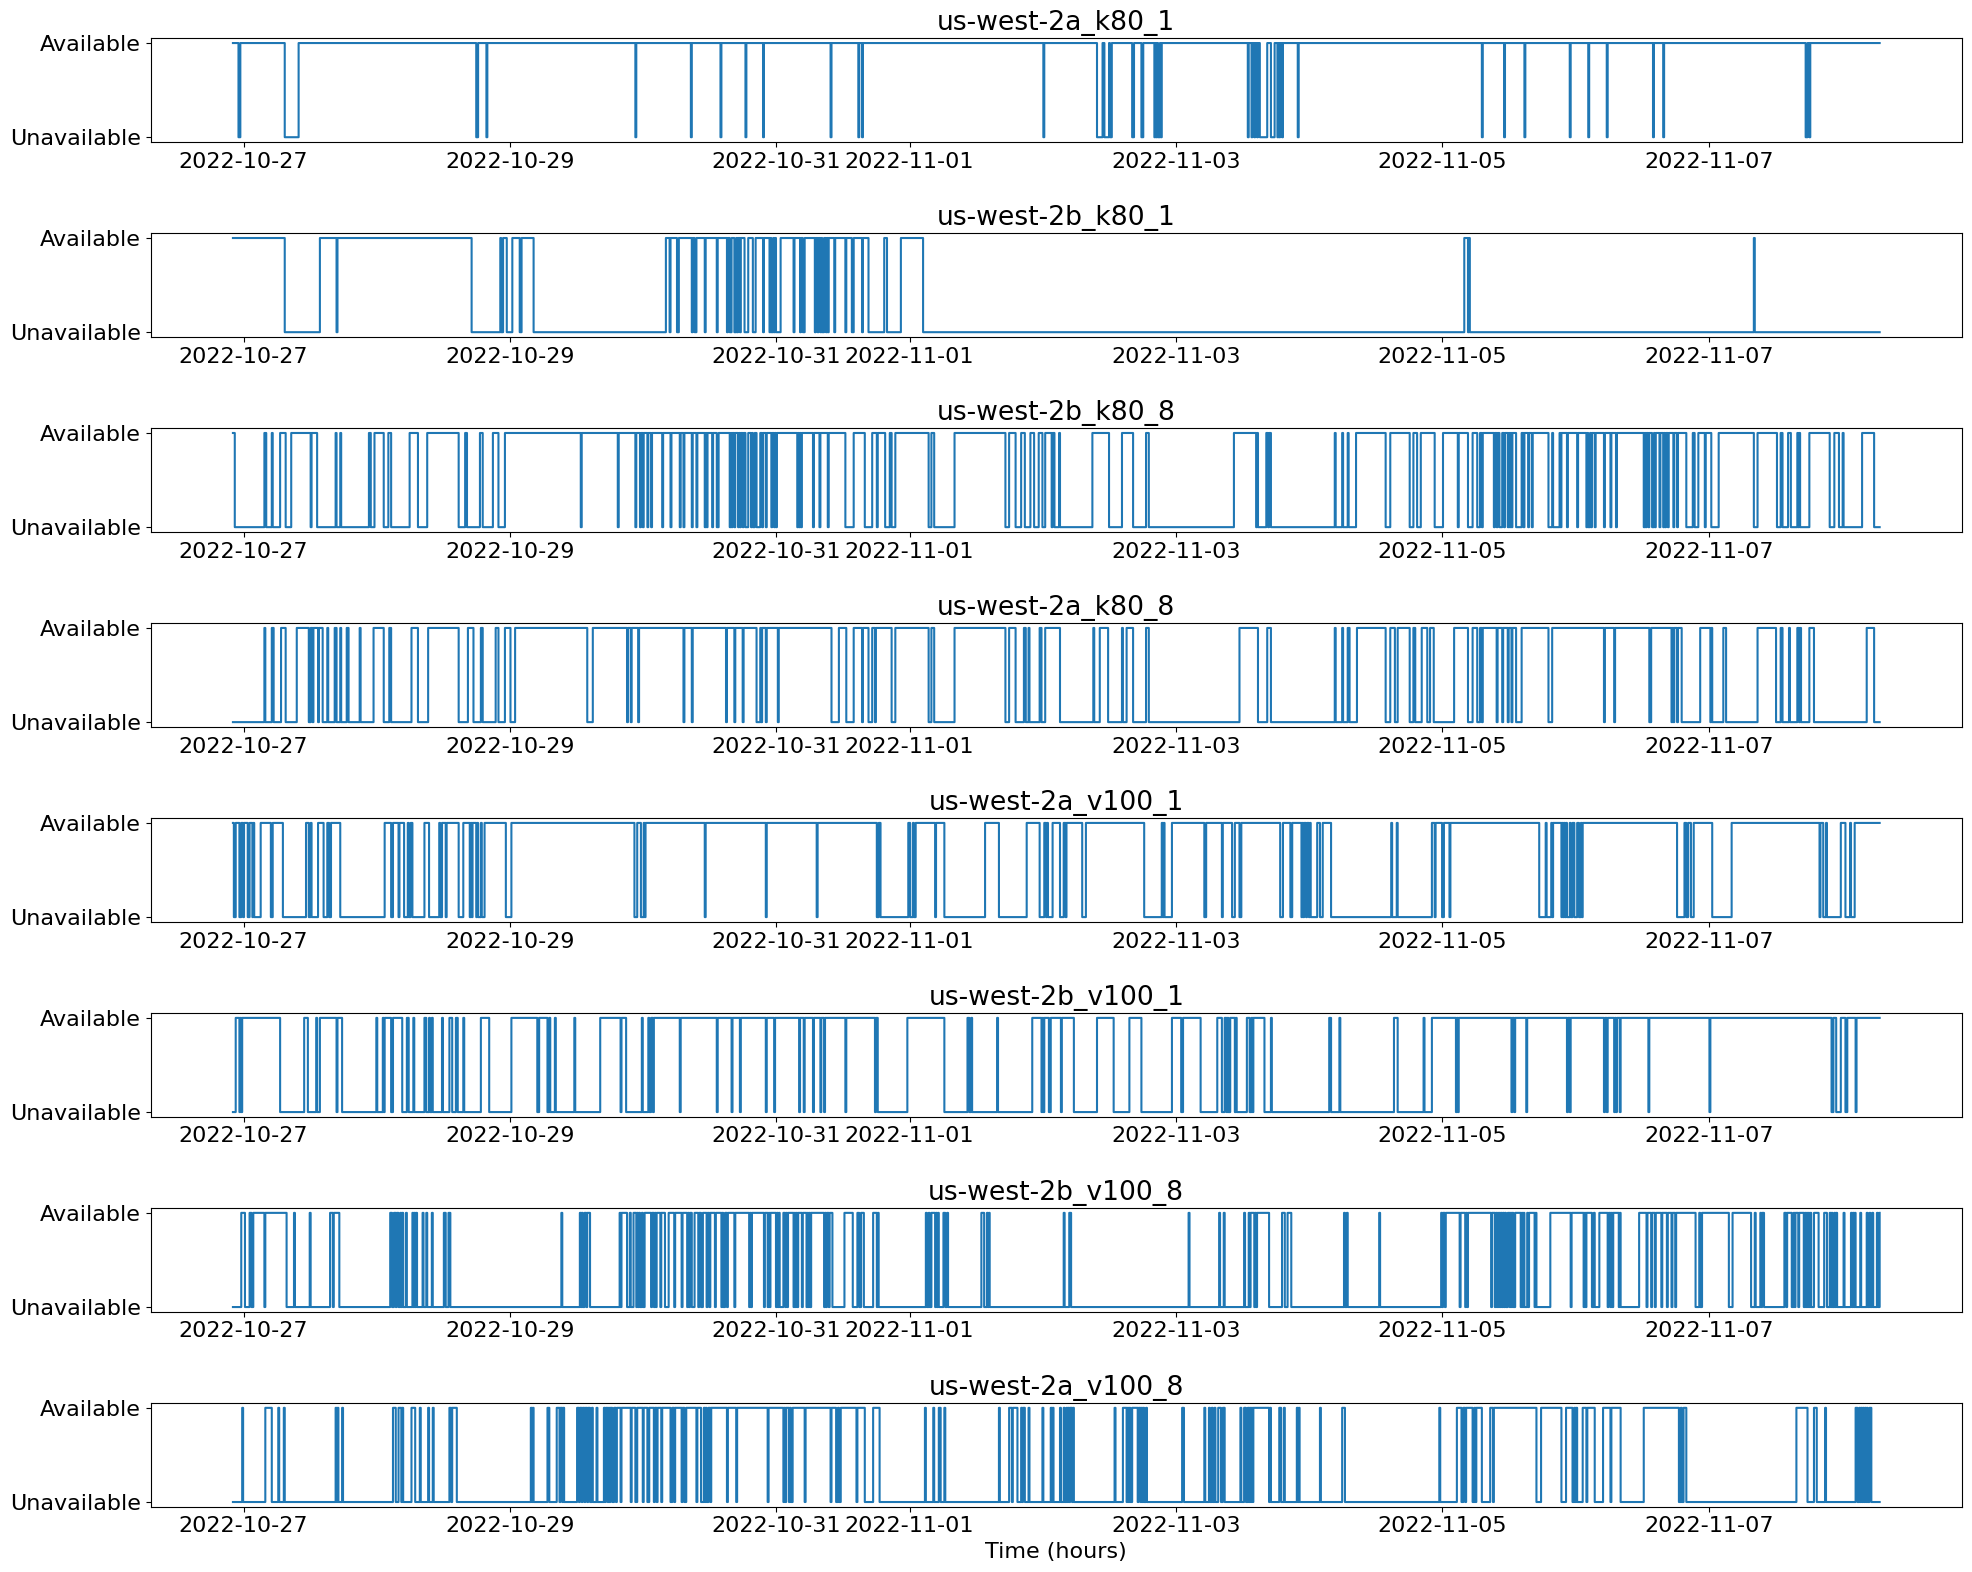

In [5]:
TRACE = 'traces/2022-10-26T22-05'

trace_path = pathlib.Path(TRACE).expanduser().absolute()
traces = {}
if trace_path.is_file():
    traces = {trace_path.stem: pd.read_csv(trace_path)}
else:
    for path in trace_path.glob('*.txt'):
        trace = pd.read_csv(path, names=['index', 'time', 'preempted'])
        traces[path.stem] = trace


fig, axes = plt.subplots(nrows=len(traces), ncols=1, figsize=(20, 2 * len(traces)))
sorted_traces = sorted(traces.items(), key=lambda x: x[0].partition('_')[-1])
for i, (trace_name, trace) in enumerate(sorted_traces):
    sns.lineplot(x=pd.to_datetime(trace['time'], format='%Y-%m-%dT%H:%M:%S.000Z'), y=1-trace['preempted'], ax=axes[i], drawstyle='steps-post')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].set_title(trace_name)
    axes[i].set_yticks([0, 1])
    axes[i].set_yticklabels(['Unavailable', 'Available'])

axes[i].set_xlabel('Time (hours)')
fig.tight_layout(h_pad=1.5)
